In [12]:
# link do github: https://github.com/themestrre/Metodos-Numericos

# **Nome:** Carlos Eduardo Leite de Oliveira

# **Matricula:** 242104345

# **MÉTODOS NUMÉRICOS EM CIÊNCIAS MECÂNICAS**

import numpy as np
import matplotlib.pyplot as plt

# Dados Iniciais do Problema


In [13]:
# Parâmetros do problema (CSTR exotérmico)
ca_in = 2000.0      # mol/m³
V = 1.0             # m³
tau = 50.0          # s
k0 = 1.0e8          # 1/s
E = 7.0e4           # J/mol
R = 8.314           # J/mol.K
DH = -2.0e5         # J/mol (exotérmica)
rho = 1.0e3         # kg/m³
cp = 4.18e3         # J/kg.K
UA = 1.5e3          # J/s.K
Te = 330.0          # K
Tc = 280.0          # K

# Função do sistema (balanço de massa e energia)

In [14]:
# Função do sistema (balanço de massa e energia)
def f_system(vars, ca0, T0):
    cA, T = vars
    rA = k0 * np.exp(-E / (R * T)) * cA
    f1 = (ca0 - cA) / tau - rA
    f2 = (T0 - T) / tau - (DH / (rho * cp)) * rA - (UA / (rho * cp * V)) * (T - Tc)
    return np.array([f1, f2])

# Método de Newton-Raphson

In [15]:
def newton_system(ca0, T0, guess, tol=1e-8, max_iter=100):
    x = np.array(guess, dtype=float)
    for _ in range(max_iter):
        f = f_system(x, ca0, T0)
        if np.linalg.norm(f) < tol:
            return x, True
        # Jacobiano numérico
        J = np.zeros((2,2))
        h = 1e-6
        for i in range(2):
            x1 = np.copy(x)
            x1[i] += h
            J[:, i] = (f_system(x1, ca0, T0) - f) / h
        try:
            dx = np.linalg.solve(J, -f)
        except np.linalg.LinAlgError:
            return x, False
        x += dx
    return x, False

# Gerações de Resultados

In [18]:
# Teste de combinações discretas (soluções numéricas)
ca0_values = [600, 1200, 2000]
T0_values = [305, 350, 420]
guess = [1000.0, 350.0]

print("\n================ RESULTADOS NUMÉRICOS ================")
print(f"{'cA0 [mol/m³]':>12} {'T0 [K]':>10} {'cA_saida [mol/m³]':>20} {'T_saida [K]':>15} {'Convergência':>15}")
print("---------------------------------------------------------------")

for T0 in T0_values:
    for ca0 in ca0_values:
        sol, ok = newton_system(ca0, T0, guess)
        if ok:
            print(f"{ca0:12.1f} {T0:10.1f} {sol[0]:20.3f} {sol[1]:15.3f} {'OK':>15}")
            guess = sol
        else:
            print(f"{ca0:12.1f} {T0:10.1f} {'---':>20} {'---':>15} {'Falhou':>15}")

# Varredura contínua para gráficos (2D)
ca0_range = np.linspace(500, 3000, 100)
T0_range = np.linspace(280, 450, 100)
CA_contour = np.zeros((len(T0_range), len(ca0_range)))
T_contour = np.zeros_like(CA_contour)
guess = [1000.0, 350.0]

for i, T0 in enumerate(T0_range):
    for j, ca0 in enumerate(ca0_range):
        sol, ok = newton_system(ca0, T0, guess)
        if ok:
            CA_contour[i, j] = sol[0]
            T_contour[i, j] = sol[1]
            guess = sol
        else:
            CA_contour[i, j] = np.nan
            T_contour[i, j] = np.nan




================ RESULTADOS NUMÉRICOS ================
cA0 [mol/m³]     T0 [K]    cA_saida [mol/m³]     T_saida [K]    Convergência
---------------------------------------------------------------
       600.0      305.0              597.019         304.699              OK
      1200.0      305.0             1193.959         304.843              OK
      2000.0      305.0             1989.751         305.041              OK
       600.0      350.0              485.072         354.168              OK
      1200.0      350.0              603.940         376.783              OK
      2000.0      350.0               82.192         438.910              OK
       600.0      420.0               19.282         444.828              OK
      1200.0      420.0               12.606         473.344              OK
      2000.0      420.0                5.658         511.273              OK


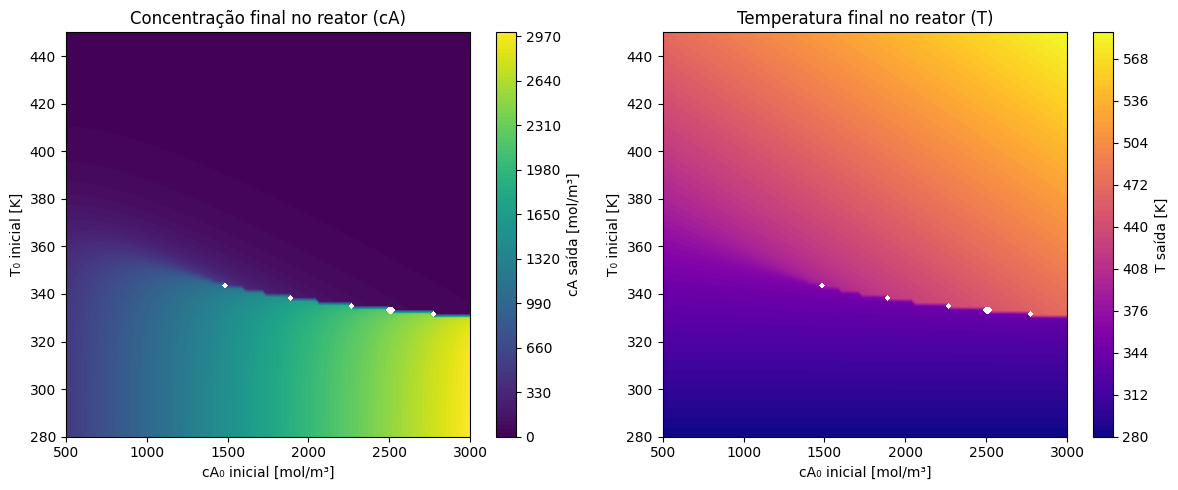

In [21]:
# Gráficos de saída (2 gráficos)
plt.figure(figsize=(12, 5))

# Concentração final
plt.subplot(1, 2, 1)
cont1 = plt.contourf(ca0_range, T0_range, CA_contour, levels=100, cmap='viridis')
plt.colorbar(cont1, label='cA saída [mol/m³]')
plt.title('Concentração final no reator (cA)')
plt.xlabel('cA₀ inicial [mol/m³]')
plt.ylabel('T₀ inicial [K]')

# Temperatura final
plt.subplot(1, 2, 2)
cont2 = plt.contourf(ca0_range, T0_range, T_contour, levels=100, cmap='plasma')
plt.colorbar(cont2, label='T saída [K]')
plt.title('Temperatura final no reator (T)')
plt.xlabel('cA₀ inicial [mol/m³]')
plt.ylabel('T₀ inicial [K]')

plt.tight_layout()
plt.show()
